# Plot feature permutation importance (FPI) results

This notebook will visualize/consolidate the FPI results of the machine learning runs (organized in different branches) in this repositiory.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.collections import PatchCollection
#from matplotlib.patches import Rectangle

# Define the repository url to work with and prefix for where it will be copied.
repo_prefix = '/pw/tmp/'
repo_name = 'sl-archive-whondrs'
repo_url = 'https://github.com/parallelworks/'+repo_name

## Grab data

Since the ML runs are on different branches, we need to jump from branch-to-branch and gather and plot data along the way.

On first branch; clone, checkout, and build feature integer ID lookup table...
fatal: destination path 'sl-archive-whondrs' already exists and is not an empty directory.
Updating files: 100% (296/296), done.
Switched to branch 'Summer-2019-log10-r01'
Your branch is up to date with 'origin/Summer-2019-log10-r01'.
Updating files: 100% (296/296), done.
Switched to branch 'Summer-2019-log10-r02'
Your branch is up to date with 'origin/Summer-2019-log10-r02'.
Updating files: 100% (240/240), done.
Switched to branch 'Summer-2019-log10-r03'
Your branch is up to date with 'origin/Summer-2019-log10-r03'.


(0.0, 6.5493862781256835)

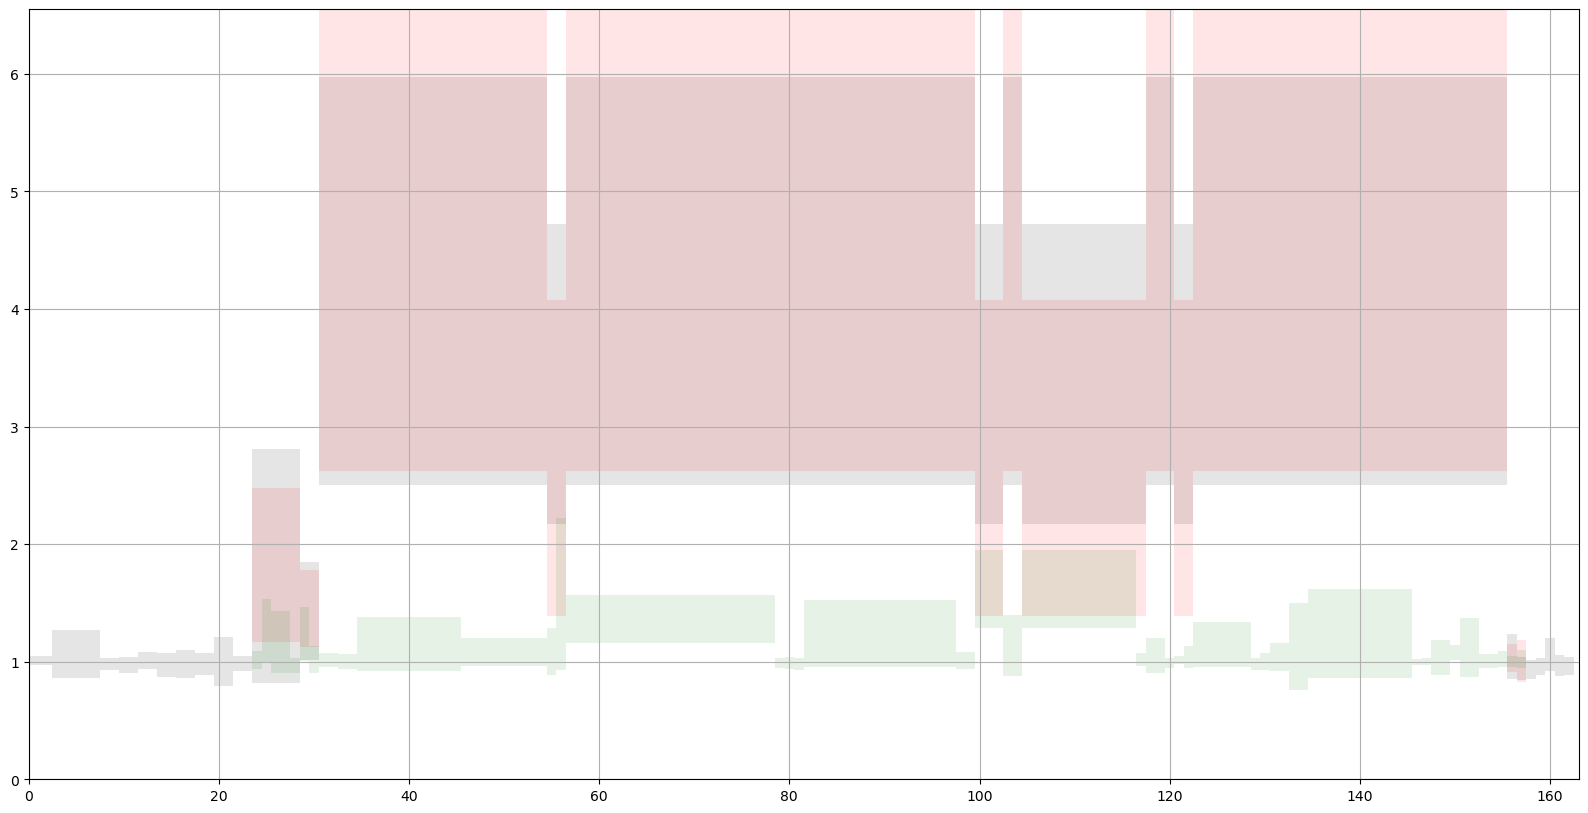

In [2]:
# Make a list of which branches to operate on.
# ASSUME that the first branch will have the most
# complete list of features (i.e. inputs) to the ML
# models. This first list of features will be
# used to create a look-up table for feature-to-feature
# comparisons/visulizations later.
list_branches = ['Summer-2019-log10-r01','Summer-2019-log10-r02','Summer-2019-log10-r03']
list_colors = ['k','r','g','b']
fpi_max = 0.0

# Initialize a plot
fig, ax = plt.subplots(1,1,figsize=(20,10))

for ll,branch in enumerate(list_branches):
    
    # Check for first branch
    if ll == 0:
        print("On first branch; clone, checkout, and build feature integer ID lookup table...")
        ! mkdir -p {repo_prefix}
        ! cd {repo_prefix}; git clone {repo_url}
        ! cd {repo_prefix}/{repo_name}; git checkout {branch}
        
        # Load data for look up table only
        fpi_avg = pd.read_csv(repo_prefix+repo_name+'/output_data/fpi_avg.csv', index_col=False)
        
        # Make the loop up table; need to invert
        # the keys (integers) with the values (feature names)
        # so that feature names can be converted to ints
        # later.
        feature_id_name_dict = dict((v,k) for k,v in fpi_avg['Unnamed: 0'].to_dict().items())
        
        # Unload the data b/c later we will want to use the index
        del fpi_avg
    else:
        # Set up is complete with first branch, just change to other branches
        ! cd {repo_prefix}/{repo_name}; git checkout {branch}
    
    # Load data and replace feature names with IDs in dict
    # In the process, get a list of features available in
    # just this branch.
    fpi_avg = pd.read_csv(repo_prefix+repo_name+'/output_data/fpi_avg.csv', index_col=0)
    branch_feature_names = list(fpi_avg.index)
    fpi_avg.rename(index=feature_id_name_dict, inplace=True)
    
    fpi_std = pd.read_csv(repo_prefix+repo_name+'/output_data/fpi_std.csv', index_col=0)
    fpi_std.rename(index=feature_id_name_dict, inplace=True)
    
    # Get summary statistics over each FPI (random shuffle
    # of grouped features) iteration
    upper = fpi_avg.mean(axis=1)+fpi_avg.std(axis=1)
    lower = fpi_avg.mean(axis=1)-fpi_avg.std(axis=1)
    error = fpi_std.max(axis=1)
    
    # If the max value is bigger than the current value,
    # update it.
    if upper.max() > fpi_max:
        fpi_max = upper.max()
    
    # Plot a box for each feature. We work feature by feature
    # because not all features will be available and not all
    # are chopped out from the edges either; sometimes features
    # will be chopped out from the middle so we don't want to
    # plot continuous lines.
    for feature in branch_feature_names:
        # Get feature ID from the dict
        f_id = feature_id_name_dict[feature]
        
        # Get the upper and lower bounds of the box
        f_upper = upper[f_id] 
        f_lower = lower[f_id]
        f_error = error[f_id]
        
        #print(f_id)
        #print(f_upper)
        #print(f_lower)
        #print(f_error)
        
        # Construct the box and plot
        # Loop over data points; create box from errors at each point
        #rect = plt.Rectangle((f_id - 0.5, f_lower), 1.0, f_upper - f_lower, facecolor="black", alpha=0.1)

        left, bottom, width, height = (f_id - 0.5, f_lower, 1.0, f_upper-f_lower)
        #print(left)
        #print(bottom)
        #print(width)
        #print(height)
        
        rect = plt.Rectangle((left, bottom), width, height,
            facecolor=list_colors[ll], alpha=0.1)
        
        # Create patch collection with specified colour/alpha
        #pc = PatchCollection(rect, facecolor='r', alpha=0.5, edgecolor='k')
    
        # Add collection to axes
        ax.add_patch(rect)
    
    # Clear loaded data
    del fpi_std
    del fpi_avg
    
# Done with looping over branches
ax.grid()
plt.xlim(0,len(feature_id_name_dict))
plt.ylim(0,fpi_max)

In [5]:
a = [
    'one',
#    'two',
    'three'
#    'four'
]

In [6]:
a

['one', 'three']